In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
destdir = '/Users/argha/Dropbox/CS/DatSci/nyc-data'
files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]

In [3]:
files

['Parking_Violations_Issued_-_Fiscal_Year_2018.csv',
 'Parking_Violations_Issued_-_Fiscal_Year_2014.csv',
 'Parking_Violations_Issued_-_Fiscal_Year_2015.csv',
 'Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
 'Parking_Violations_Issued_-_Fiscal_Year_2016.csv']

In [4]:
#df2014 = pd.read_csv('/Users/argha/Dropbox/CS/DatSci/nyc-data/Parking_Violations_Issued_-_Fiscal_Year_2014.csv')
#df2015 = pd.read_csv('/Users/argha/Dropbox/CS/DatSci/nyc-data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv')
df2016 = pd.read_csv('/Users/argha/Dropbox/CS/DatSci/nyc-data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv')
#df2017 = pd.read_csv('/Users/argha/Dropbox/CS/DatSci/nyc-data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
#df2018 = pd.read_csv('/Users/argha/Dropbox/CS/DatSci/nyc-data/Parking_Violations_Issued_-_Fiscal_Year_2018.csv')

/Users/argha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,34,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Take a look into the 2016 data

In [5]:
df2016.head(n=2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1363745270,GGY6450,99,PAS,07/09/2015,46,SDN,HONDA,P,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1363745293,KXD355,SC,PAS,07/09/2015,21,SUBN,CHEVR,P,55730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2016.shape

(10626899, 51)

So in the 2016 dataset there are about 10.6 million entries for parking ticket, and each entry has 51 columns.

Lets take a look at the number of unique values for each column name...

In [7]:
d = {'Unique Entry': df2016.nunique(axis = 0),
        'Nan Entry': df2016.isnull().any()}
pd.DataFrame(data = d, index = df2016.columns.values)

,Nan Entry,Unique Entry
Summons Number,False,10626899
Plate ID,True,3011042
Registration State,False,68
Plate Type,False,85
Issue Date,False,2246
Violation Code,False,100
Vehicle Body Type,True,2145
Vehicle Make,True,6031
Issuing Agency,False,17
Street Code1,False,6465


As it turns out, the last 11 columns in this dataset has no entry. So we can ignore those columns, while carrying out any visualization operation in this dataframe.

Also if the entry does not have a **Plate ID** it is very hard to locate those cars. Therefore I am going to drop those rows as well.

In [8]:
drop_column = ['No Standing or Stopping Violation', 'Hydrant Violation',
               'Double Parking Violation', 'Latitude', 'Longitude',
               'Community Board', 'Community Council ', 'Census Tract', 'BIN',
               'BBL', 'NTA',
               'Street Code1', 'Street Code2', 'Street Code3','Meter Number', 'Violation Post Code',
                'Law Section', 'Sub Division', 'House Number', 'Street Name']
df2016.drop(drop_column, axis = 1, inplace = True)

In [9]:
drop_row = ['Plate ID']
df2016.dropna(axis = 0, how = 'any', subset = drop_row, inplace = True)

Check if there is anymore rows left without a **Plate ID**.

In [10]:
df2016['Plate ID'].isnull().any()

False

In [11]:
df2016.shape

(10624735, 31)

# Create a sample data for visualization

The cleaned dataframe has 10624735 rows and 40 columns. 

But this is still a lot of data points. I does not make sense to use all of them to get an idea of distribution of the data points. So for visualization I will use only 0.1% of the whole data. Assmuing that the entries are not sorted I pick my 0.1% data points from the main dataframe at random.

In [12]:
mini2016 = df2016.sample(frac = 0.01, replace = False)

In [13]:
mini2016.shape

(106247, 31)

My sample dataset has about 10K data points, which I will use for data visualization. Using the whole dataset is unnecessary and time consuming.

## Barplot of 'Registration State'

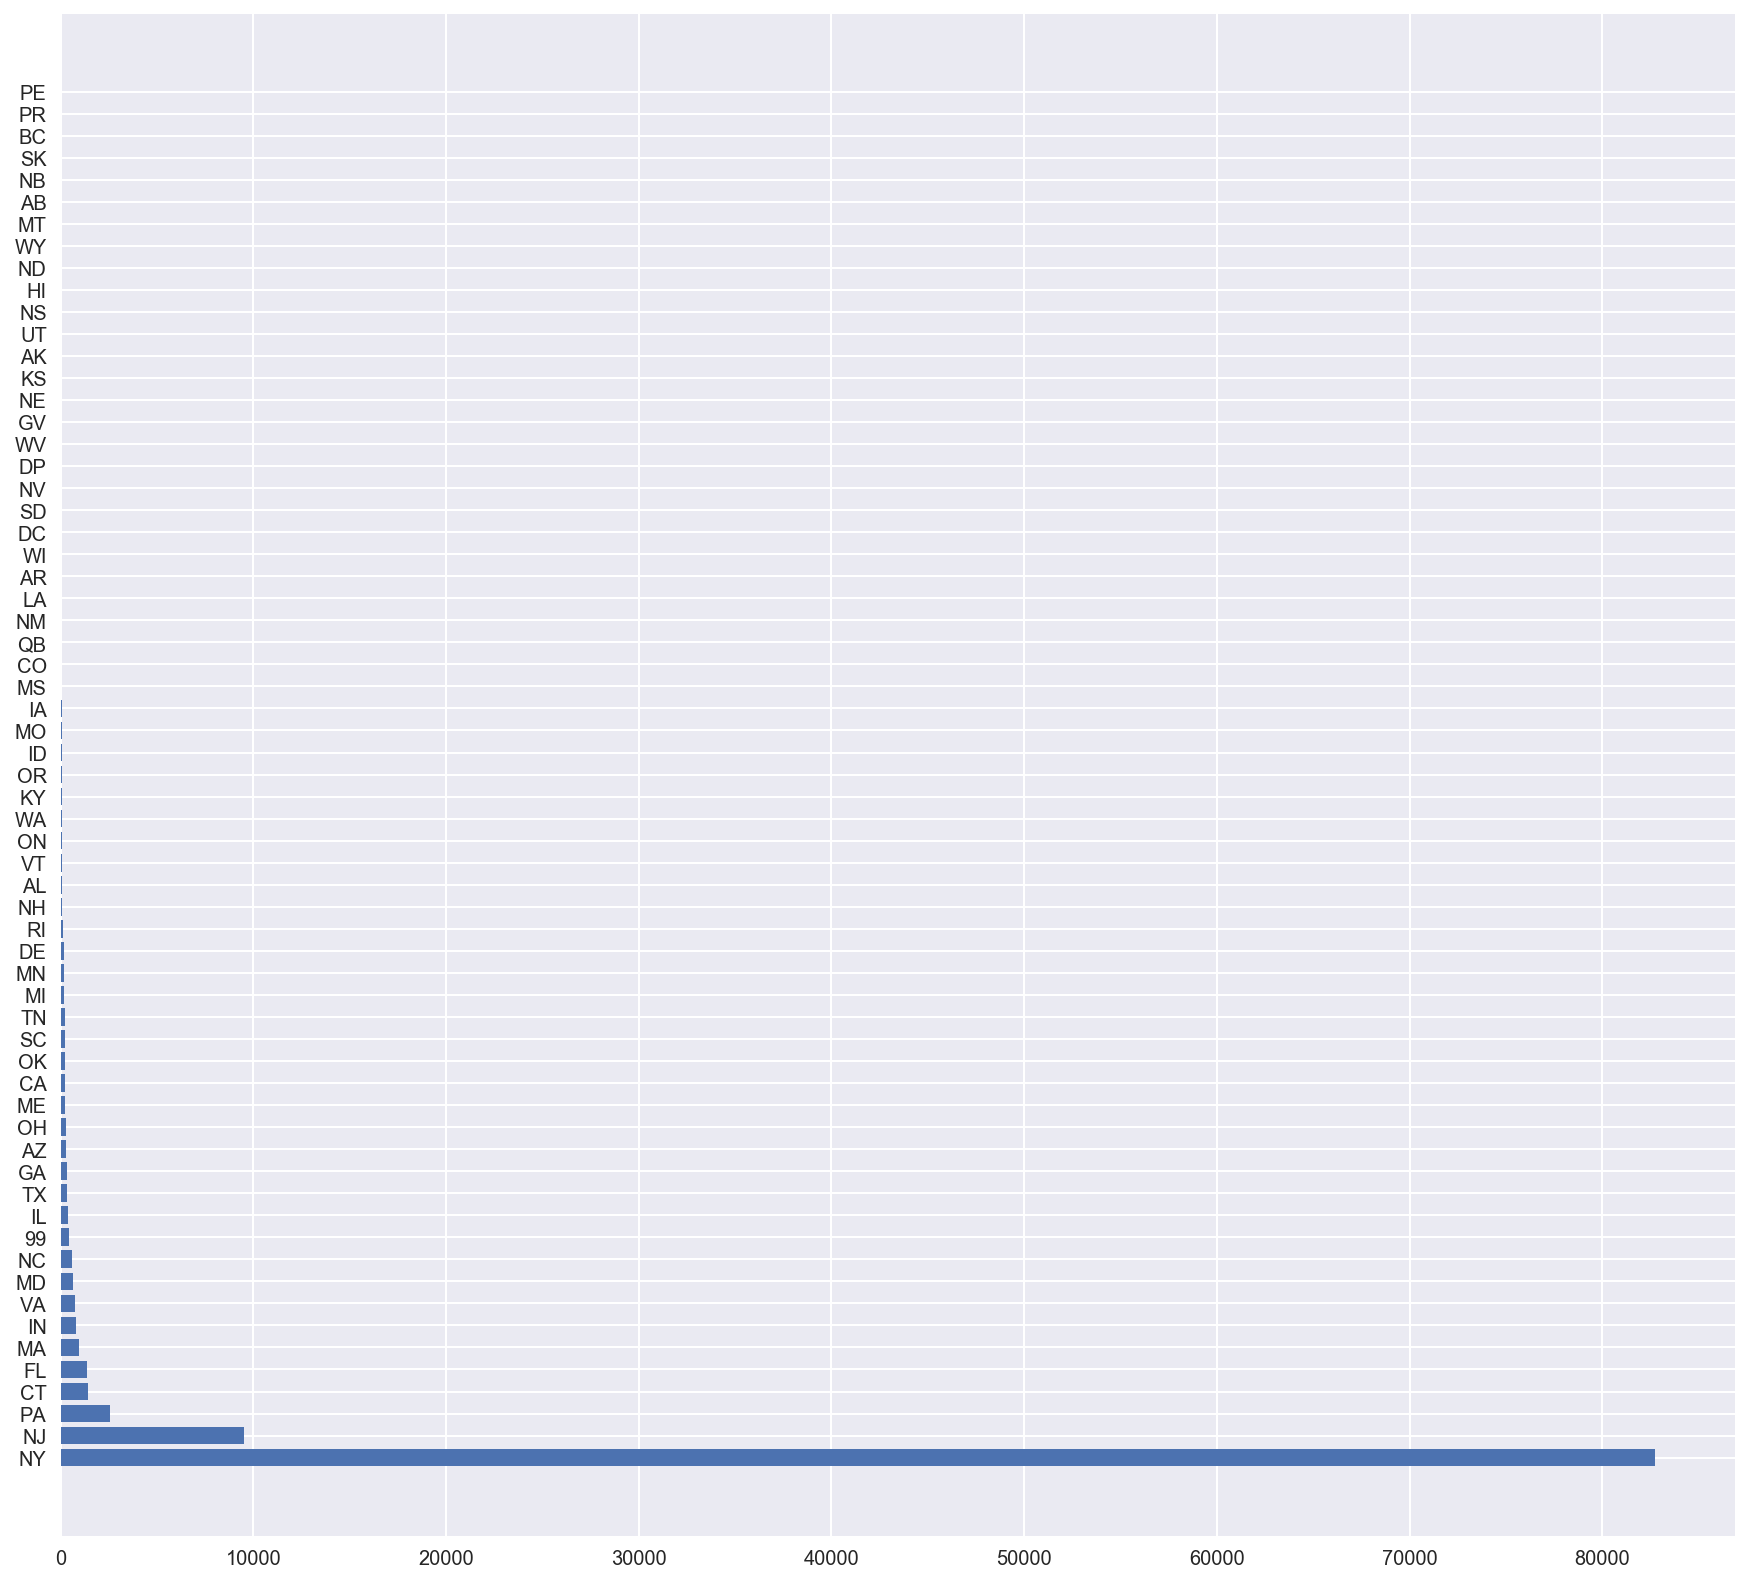

In [14]:
x_ticks = mini2016['Registration State'].value_counts().index
heights = mini2016['Registration State'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()


In [15]:
pd.DataFrame(mini2016['Registration State'].value_counts()/len(mini2016)).nlargest(10, columns = ['Registration State'])

,Registration State
NY,0.778723
NJ,0.089584
PA,0.024311
CT,0.013497
FL,0.013092
MA,0.008979
IN,0.007558
VA,0.007031
MD,0.005958
NC,0.005384


You can see from the barplot above: in our sample ~77.67% cars are registered in state : **NY**. After that 9.15% cars are registered in state : **NJ**, followed by **PA**, **CT**, and **FL**.

## How the number of tickets given changes with each month?

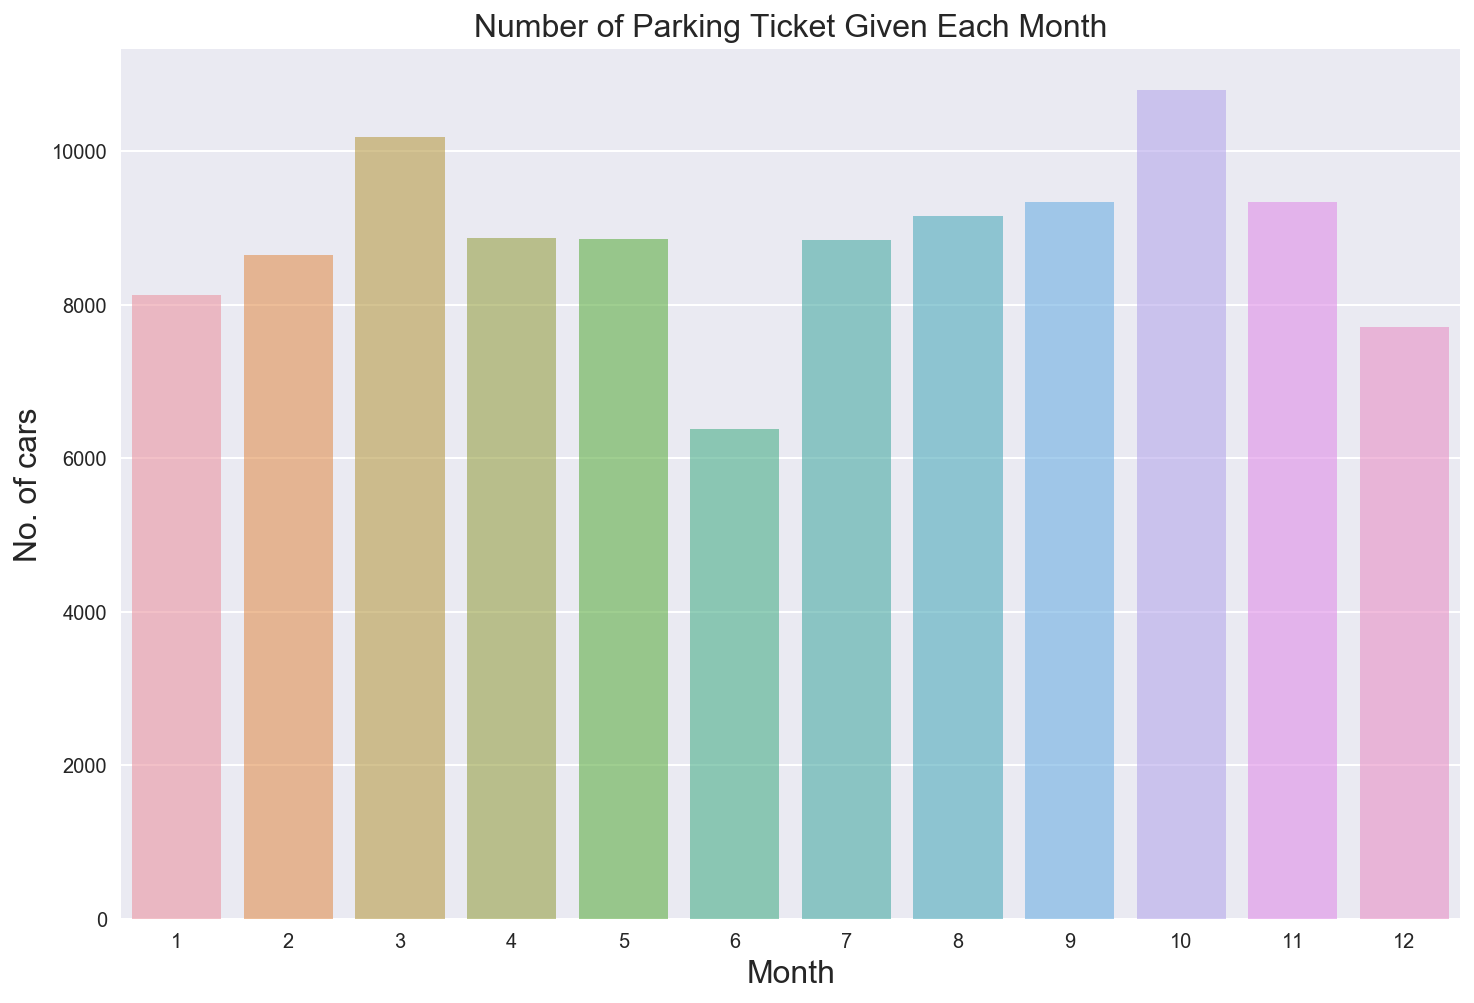

In [16]:
month = []
for time_stamp in pd.to_datetime(mini2016['Issue Date']):
    month.append(time_stamp.month)
m_count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=m_count.values, x=m_count.index, alpha=0.6)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

So from the barplot above **March** and **October** has the highest number of tickets!

## How many parking tickets are given for each violation code?

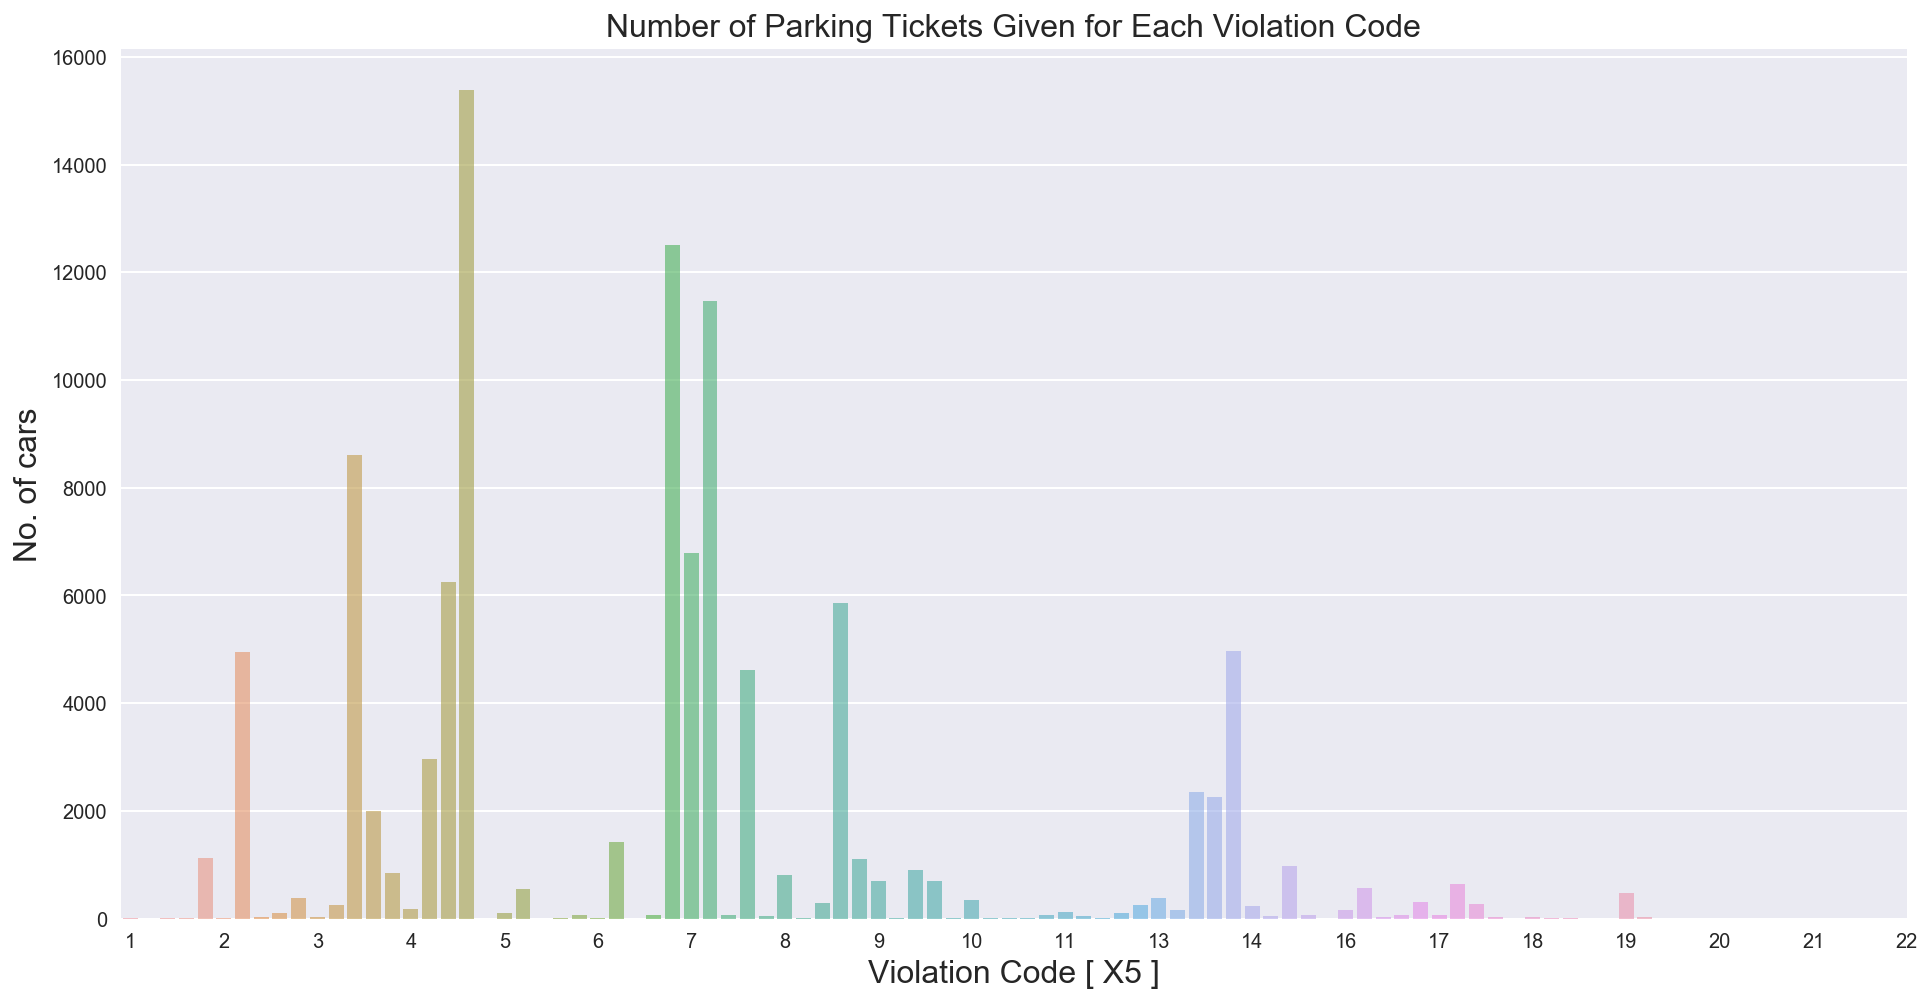

In [17]:
violation_code = mini2016['Violation Code'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_code.values, x=violation_code.index, alpha=0.6)
#plt.xticks(np.arange(0,101, 10.0))
f.set(xticks=np.arange(0,100, 5.0))
plt.title("Number of Parking Tickets Given for Each Violation Code", fontsize=16)
plt.xlabel("Violation Code [ X5 ]", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

## How many parking tickets are given for each body type?

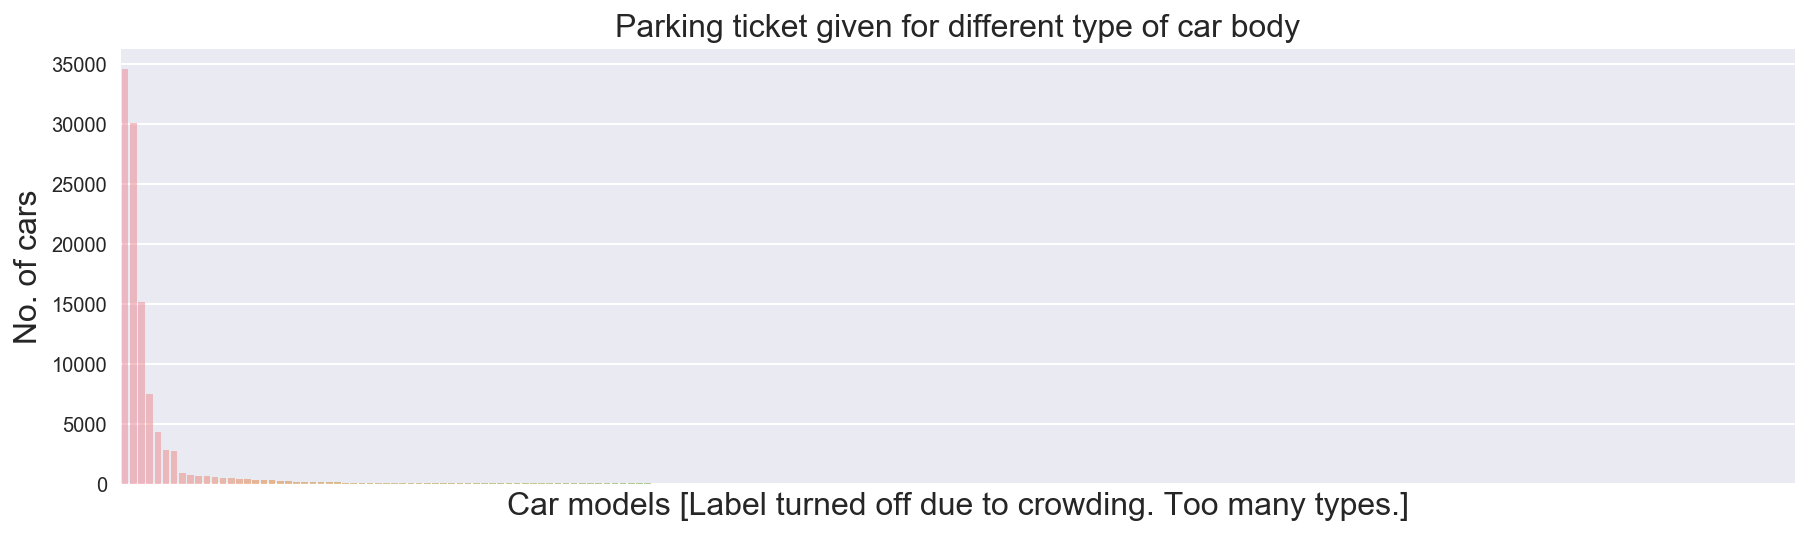

In [18]:
x_ticks = mini2016['Vehicle Body Type'].value_counts().index
heights = mini2016['Vehicle Body Type'].value_counts().values
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,4))
f = sns.barplot(y=heights, x=y_pos, orient = 'v', alpha=0.6);
# remove labels
plt.tick_params(labelbottom='off')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Car models [Label turned off due to crowding. Too many types.]', fontsize=16);
plt.title('Parking ticket given for different type of car body', fontsize=16);


In [19]:
df_bodytype = pd.DataFrame(mini2016['Vehicle Body Type'].value_counts() / len(mini2016)).nlargest(10, columns = ['Vehicle Body Type'])

Top 10 car body types that get the most parking tickets are listed below : 

In [20]:
df_bodytype

,Vehicle Body Type
SUBN,0.324819
4DSD,0.282521
VAN,0.142733
DELV,0.070336
SDN,0.040622
2DSD,0.026382
PICK,0.025525
REFG,0.008170
TRAC,0.007087
UTIL,0.006203


In [21]:
df_bodytype.sum(axis = 0)/len(mini2016)

Vehicle Body Type    0.000009
dtype: float64

Top 10 vehicle body type includes 93.42% of my sample dataset.

## How many parking tickets are given for each vehicle make?

Just for the sake of changing the flavor of visualization this time I will make a logplot of car no. vs make. In that case we will be able to see much smaller values in the same graph with larger values.

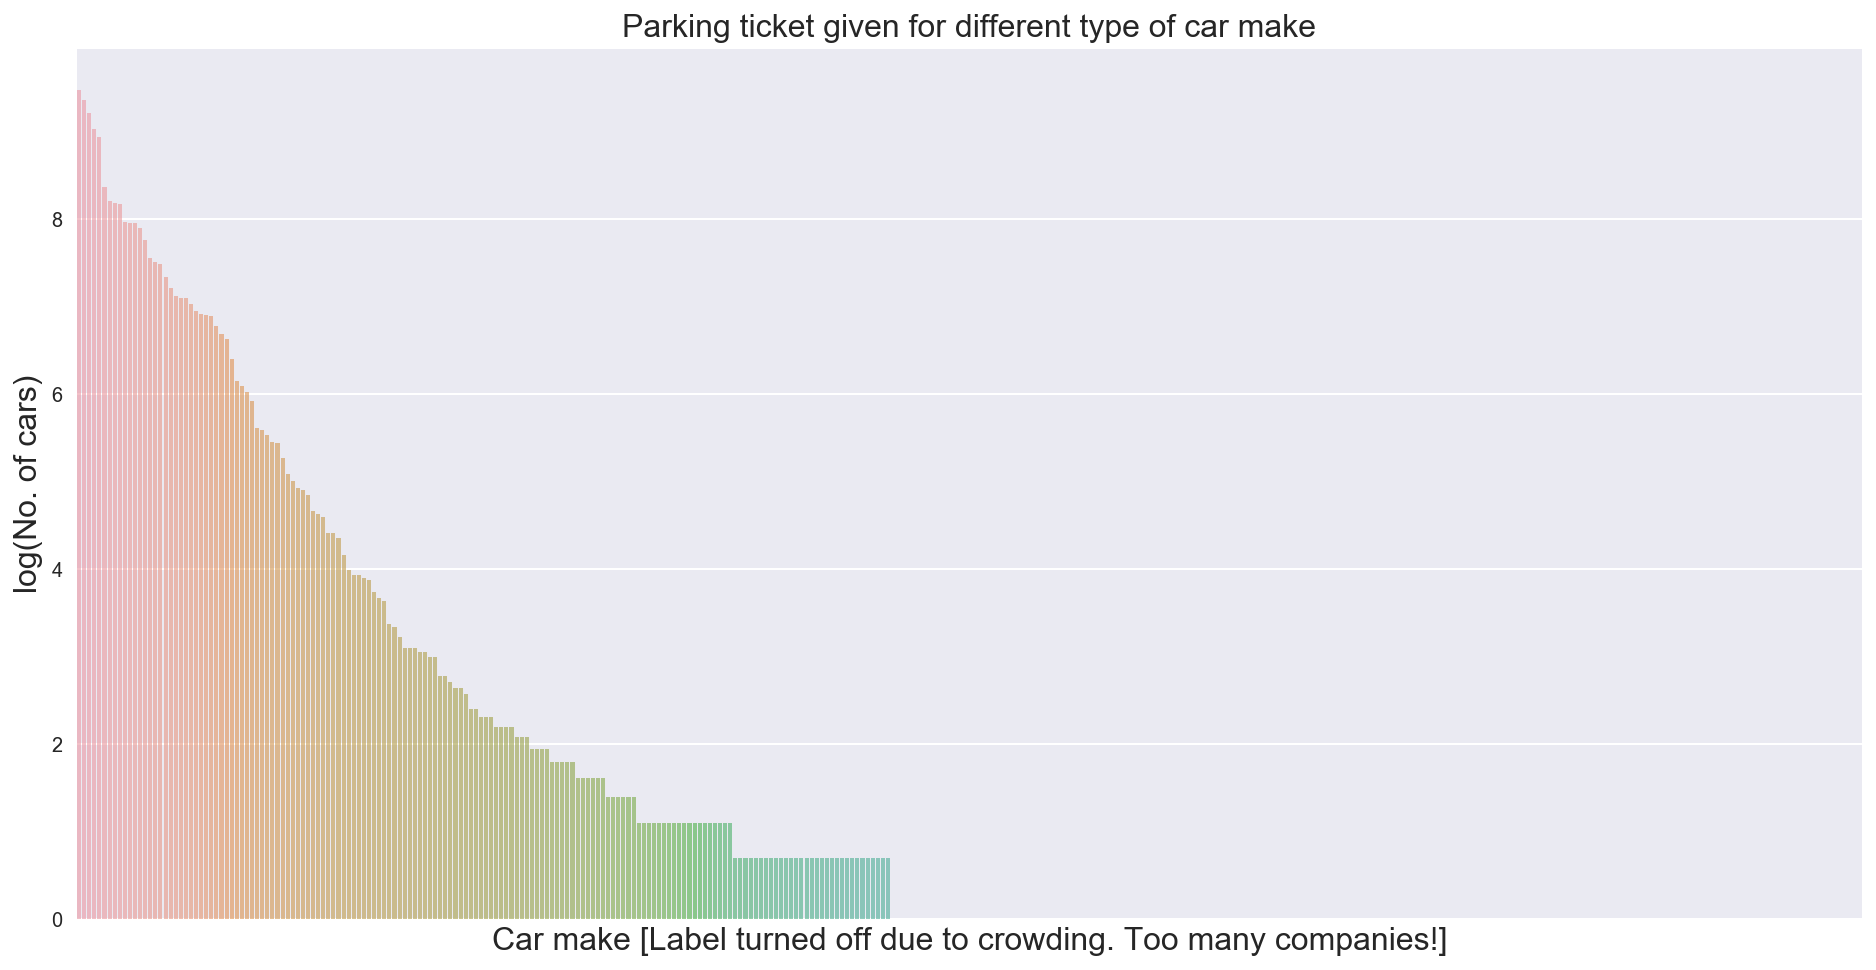

In [22]:
vehicle_make = mini2016['Vehicle Make'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=np.log(vehicle_make.values), x=vehicle_make.index, alpha=0.6)
# remove labels
plt.tick_params(labelbottom='off')
plt.ylabel('log(No. of cars)', fontsize=16);
plt.xlabel('Car make [Label turned off due to crowding. Too many companies!]', fontsize=16);
plt.title('Parking ticket given for different type of car make', fontsize=16);

plt.show();

In [23]:
pd.DataFrame(mini2016['Vehicle Make'].value_counts() / len(mini2016)).nlargest(10, columns = ['Vehicle Make'])

,Vehicle Make
FORD,0.122874
TOYOT,0.109820
HONDA,0.094732
NISSA,0.079014
CHEVR,0.072219
FRUEH,0.040538
ME/BE,0.034617
DODGE,0.033987
BMW,0.033375
JEEP,0.027238


## Insight on violation time

In the raw data the **Violaation Time** is in a format, which is non-interpretable using standard **to_datatime** function in pandas. We need to change it in a useful format so that we can use the data. After formatting we may replace the old **Violation Time ** column with the new one.

In [24]:
timestamp = []
for time in mini2016['Violation Time']:
    if len(str(time)) == 5:
        time = time[:2] + ':' + time[2:]
        timestamp.append(pd.to_datetime(time, errors='coerce'))
    else:
        timestamp.append(pd.NaT)
    

mini2016 = mini2016.assign(Violation_Time2 = timestamp)
mini2016.drop(['Violation Time'], axis = 1, inplace = True)
mini2016.rename(index=str, columns={"Violation_Time2": "Violation Time"}, inplace = True)

So in the new **Violation Time** column the data is in **Timestamp** format.

In [25]:
hours = [lambda x: x.hour, mini2016['Violation Time']]

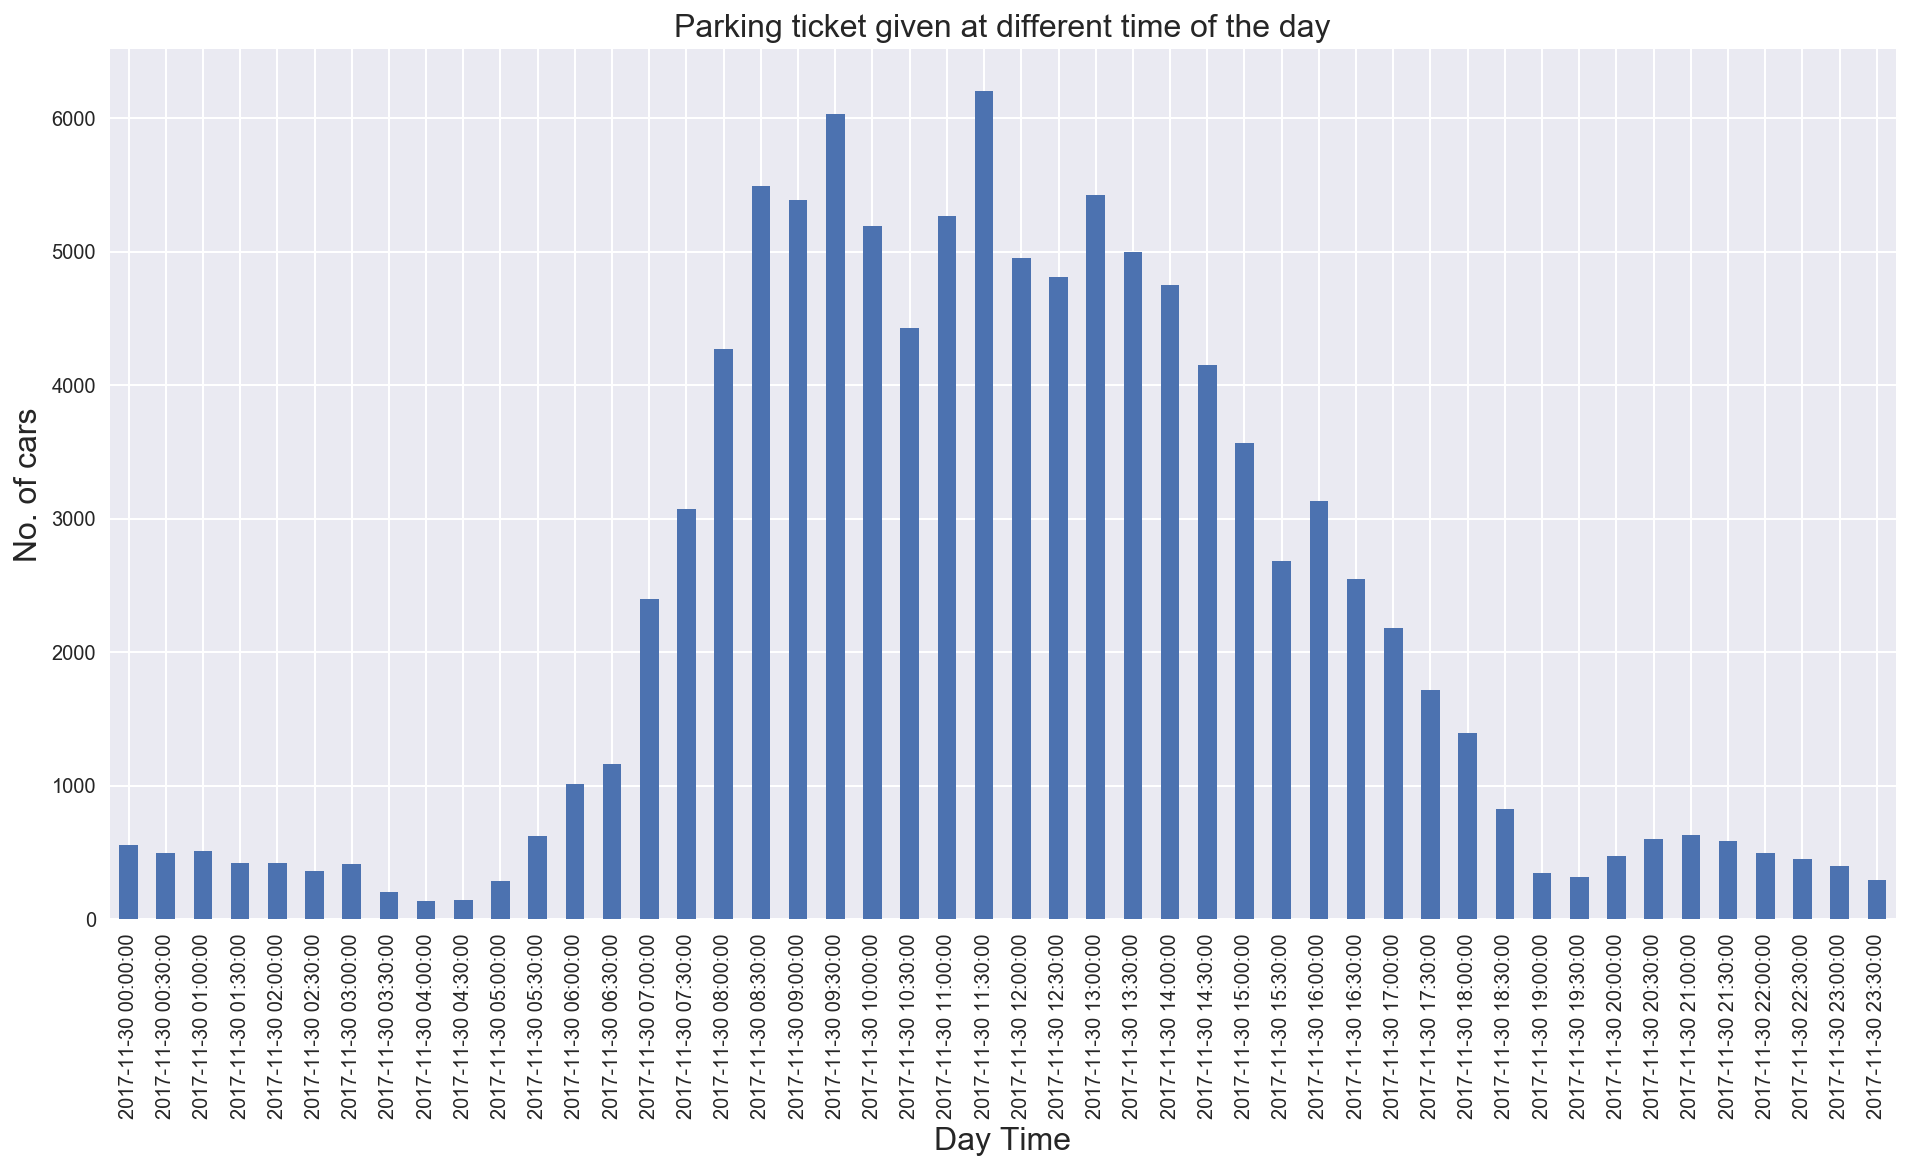

In [26]:
# Getting the histogram
mini2016.set_index('Violation Time', drop=False, inplace=True)
plt.figure(figsize=(16,8))
mini2016['Violation Time'].groupby(pd.TimeGrouper(freq='30Min')).count().plot(kind='bar');
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Day Time', fontsize=16);
plt.title('Parking ticket given at different time of the day', fontsize=16);


## Parking ticket vs county

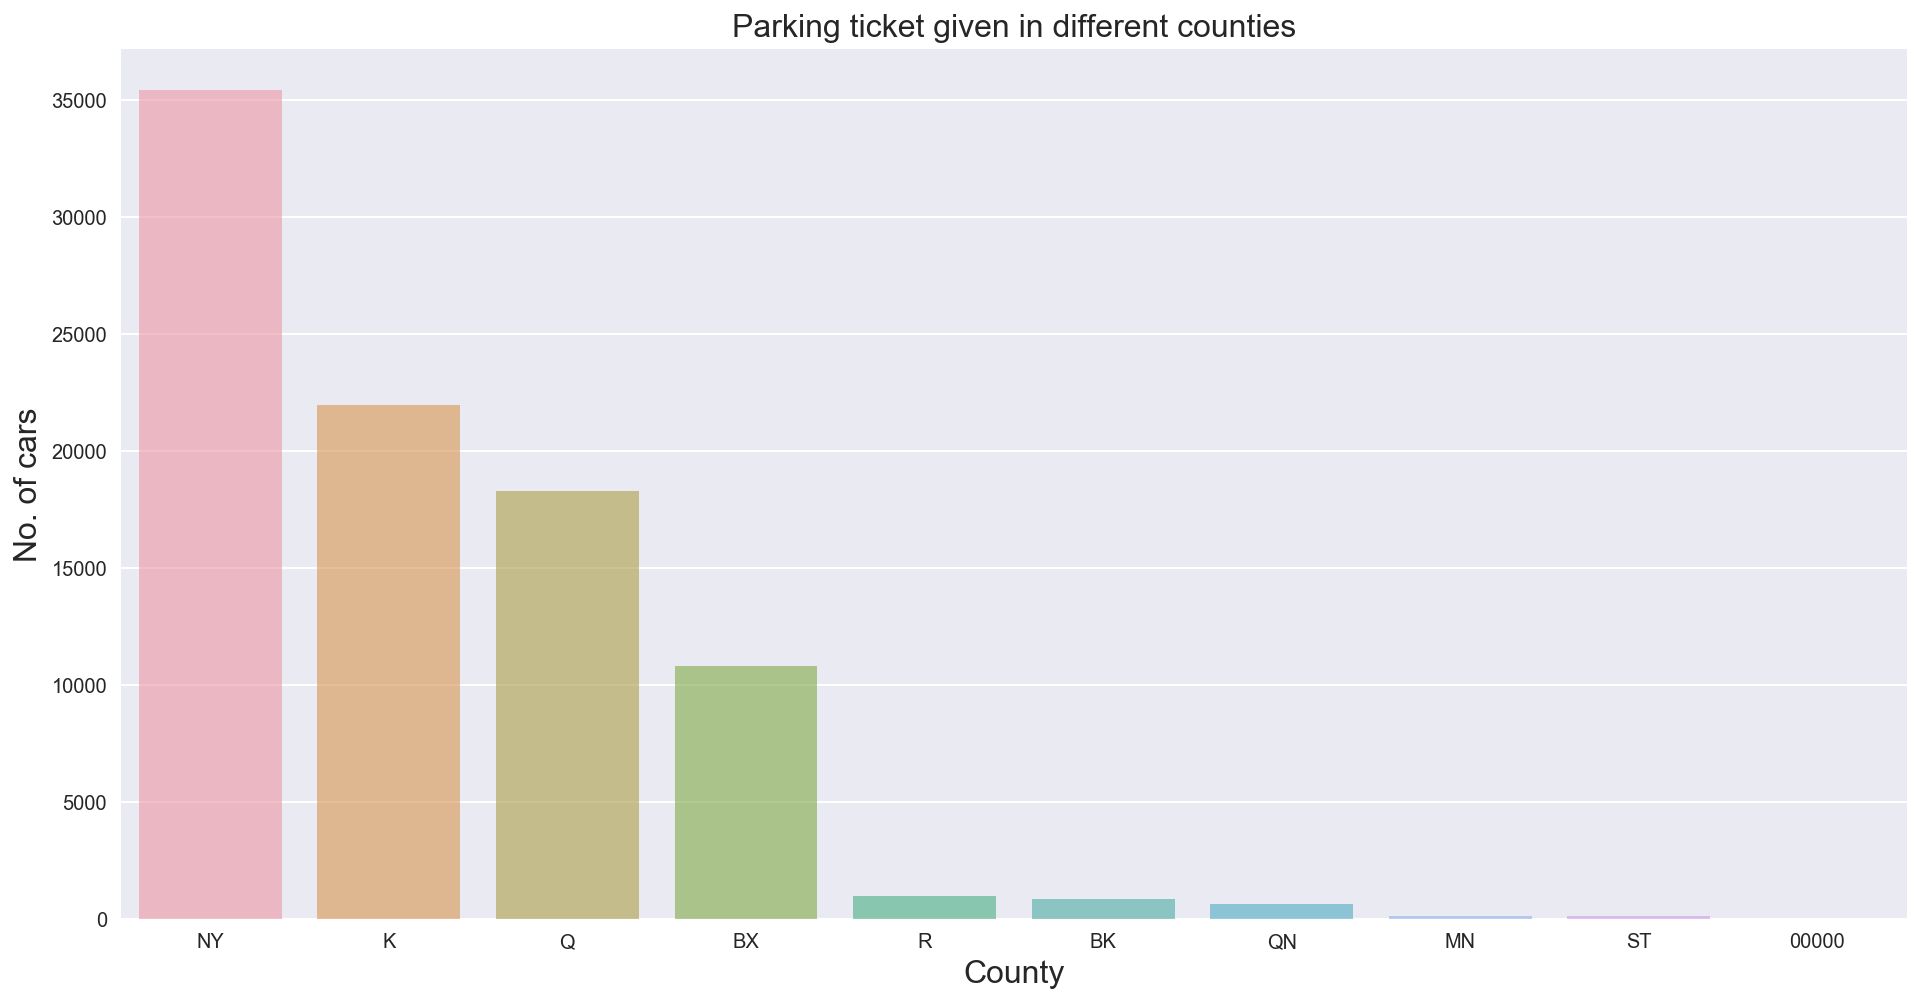

In [27]:
violation_county = mini2016['Violation County'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_county.values, x=violation_county.index, alpha=0.6)
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

## Unregistered Vehicle?

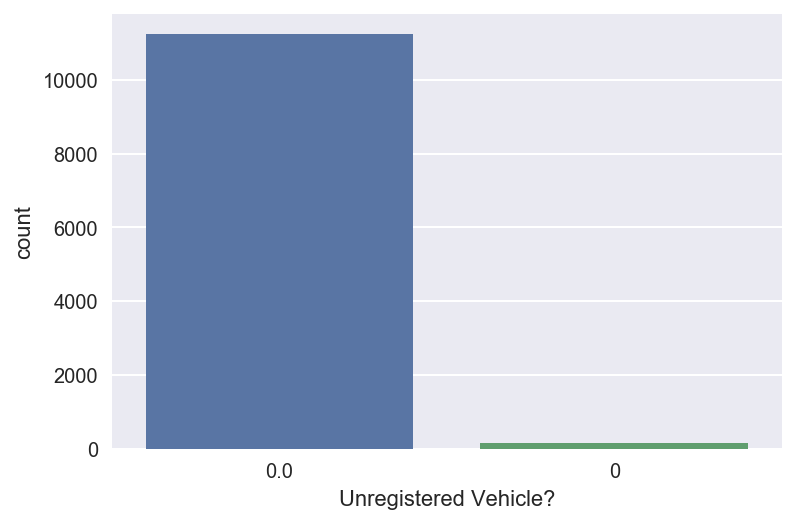

In [28]:
sns.countplot(x = 'Unregistered Vehicle?', data = mini2016)

In [29]:
mini2016['Unregistered Vehicle?'].unique()

array([nan, 0.0, '0'], dtype=object)

## Vehicle Year

In [38]:
pd.DataFrame(mini2016['Vehicle Year'].value_counts()).nlargest(10, columns = ['Vehicle Year'])

,Vehicle Year
0.0,24382
2015.0,10045
2014.0,8835
2013.0,7629
2012.0,5165
2007.0,5052
2006.0,4592
2011.0,4559
2008.0,4269
2005.0,4061


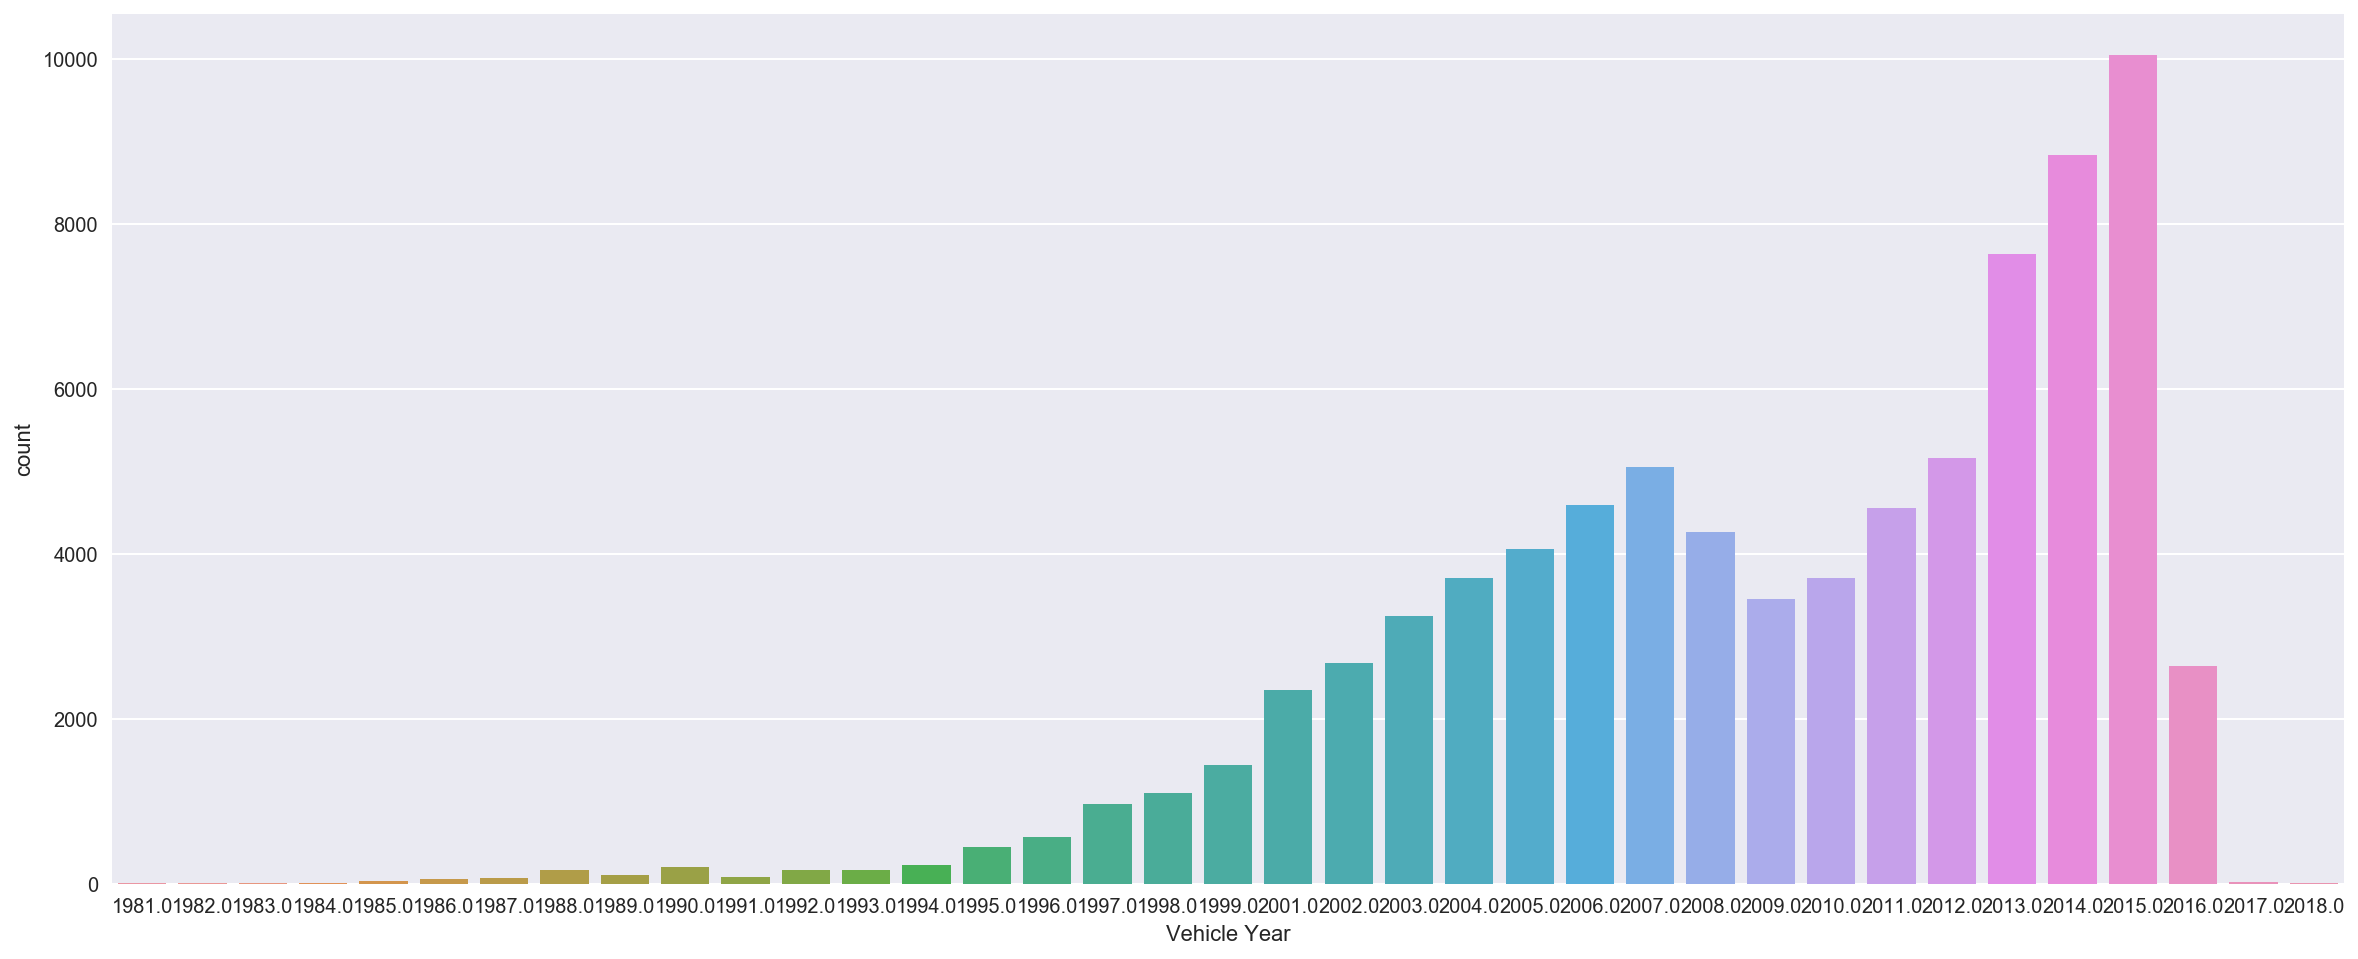

In [55]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'Vehicle Year', data = mini2016.loc[(mini2016['Vehicle Year']>1980) & (mini2016['Vehicle Year'] <= 2018)]);

## Violation In Front Of Or Opposite

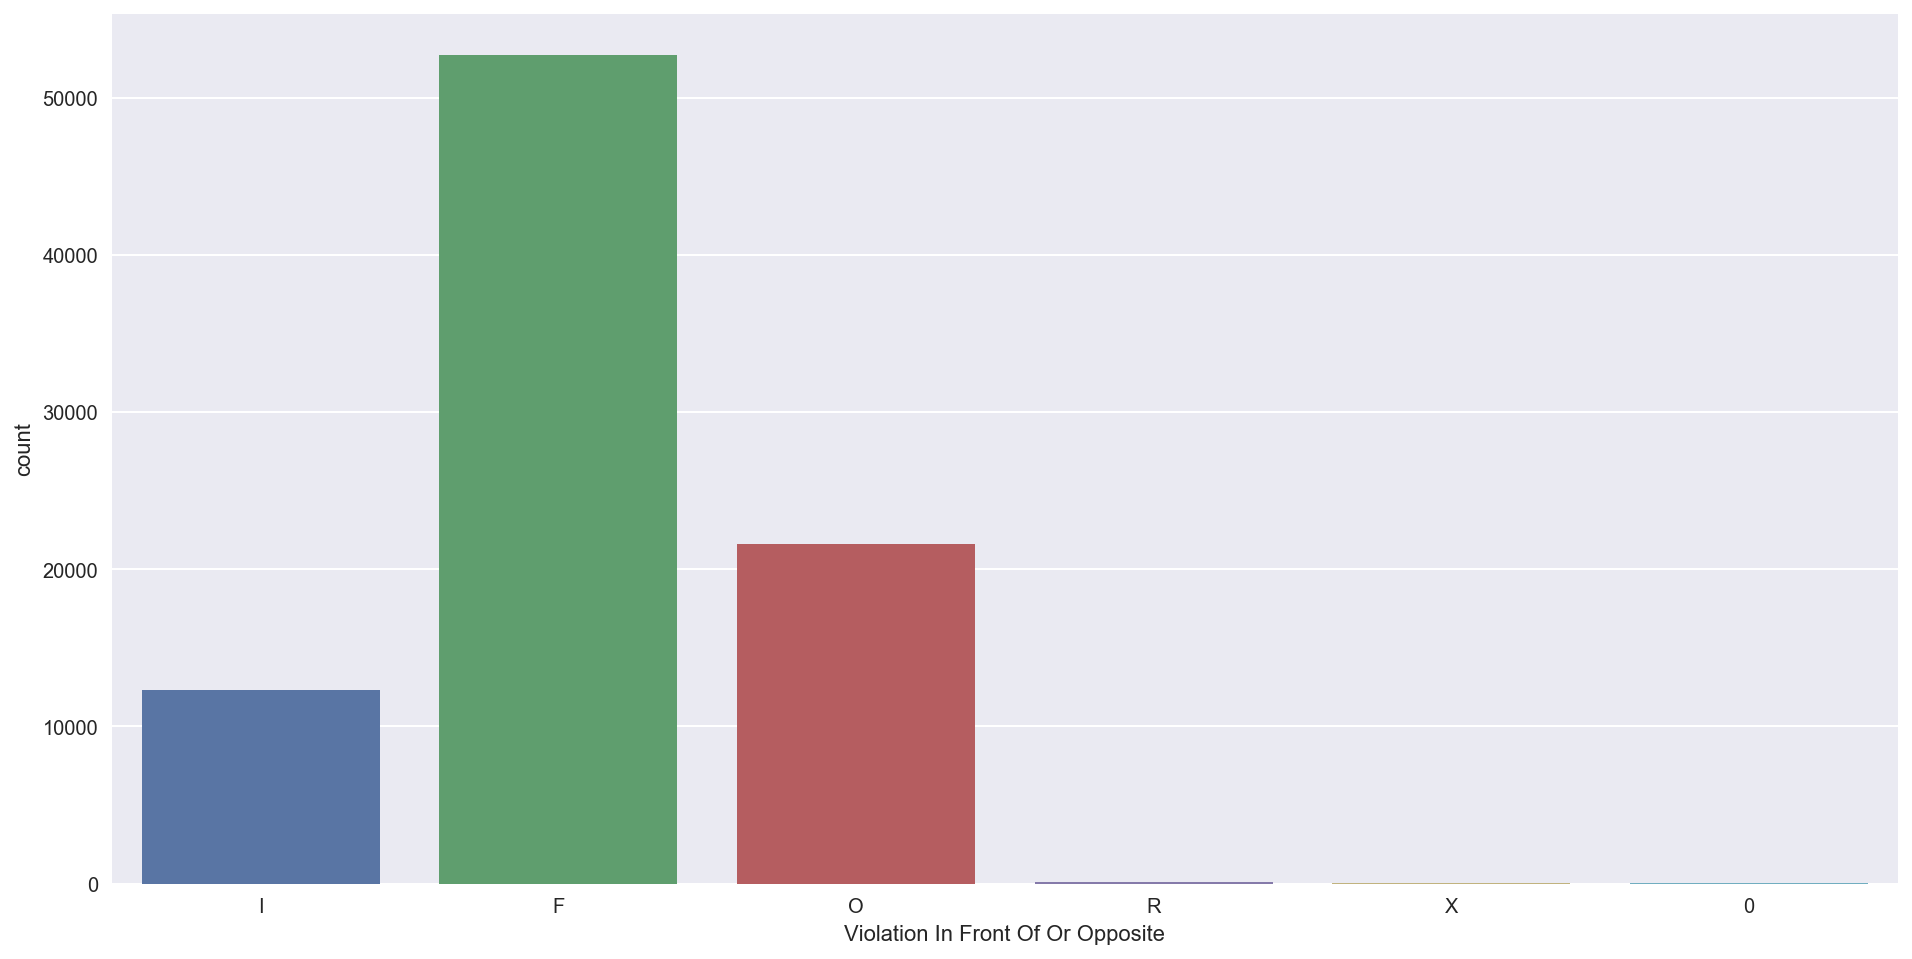

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'Violation In Front Of Or Opposite', data = mini2016);

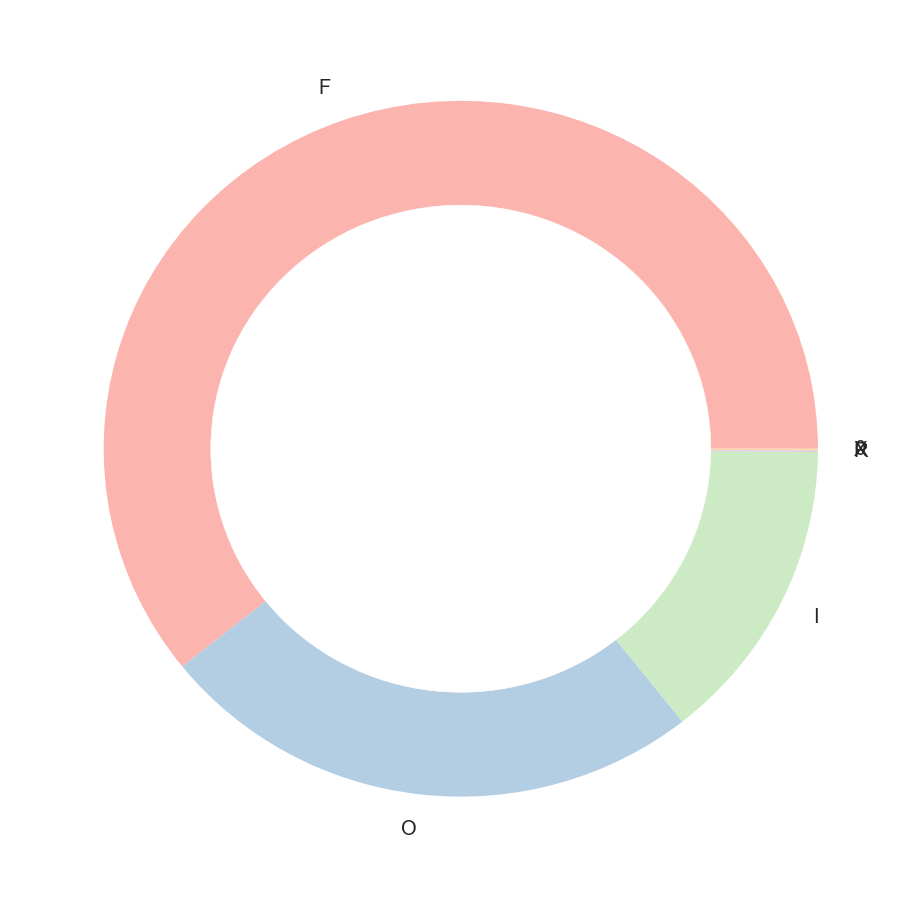

In [33]:
# create data
names = mini2016['Violation In Front Of Or Opposite'].value_counts().index
size = mini2016['Violation In Front Of Or Opposite'].value_counts().values
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
